In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

df = pd.read_csv('Data.csv')
print('Initial Data: ', df.shape)
df = df.dropna()
df = df.iloc[:, :10]
print('Data after null removal: ', df.shape)

Initial Data:  (20927, 15)
Data after null removal:  (20867, 10)


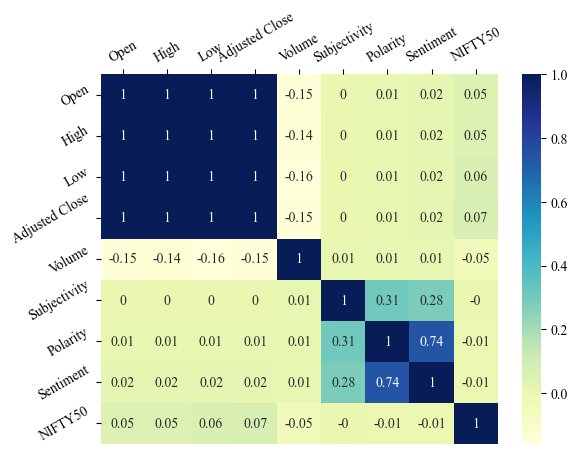

In [2]:
correlation_matrix = df[['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Subjectivity',
       'Polarity', 'Sentiment', 'NIFTY50']].corr(method = 'pearson').round(2) # ‘kendall’ ‘spearman’
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, fmt='g', cmap="YlGnBu", square=False)
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='y', labelrotation=30)
fig.savefig('1a pearson_corr_mat', bbox_inches='tight', dpi = 300)

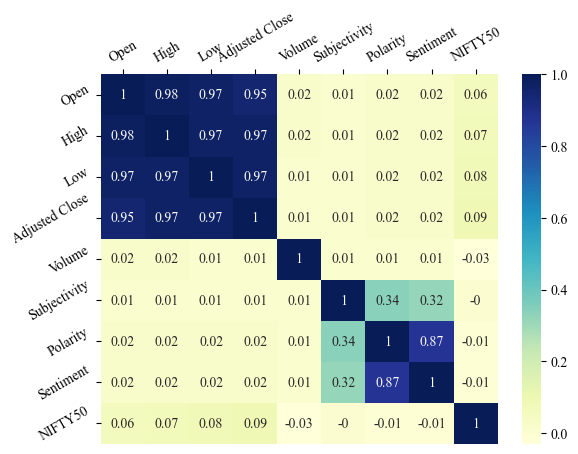

In [3]:
correlation_matrix = df[['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Subjectivity',
       'Polarity', 'Sentiment', 'NIFTY50']].corr(method = 'kendall').round(2)
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='y', labelrotation=30)
fig.savefig('1b kendall_corr_mat', bbox_inches='tight', dpi = 300)

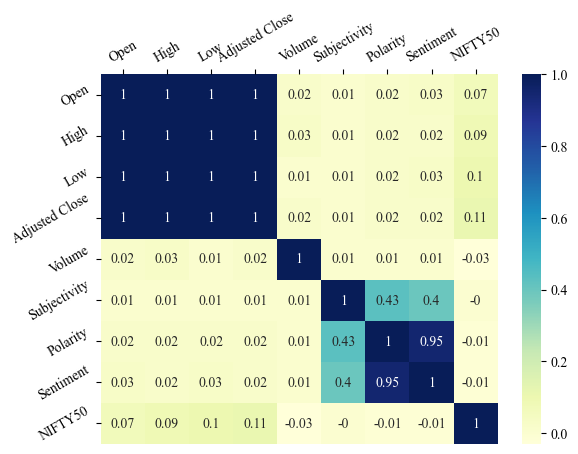

In [4]:
correlation_matrix = df[['Open', 'High', 'Low', 'Adjusted Close', 'Volume', 'Subjectivity',
       'Polarity', 'Sentiment', 'NIFTY50']].corr(method = 'spearman').round(2)
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation=30)
ax.tick_params(axis='y', labelrotation=30)
fig.savefig('1c spearman_corr_mat', bbox_inches='tight', dpi = 300)

In [5]:
avg = np.mean(df[['Open', 'High', 'Low' , 'Adjusted Close']], axis=1).astype(int)
df = df.drop(columns = ['Date', 'Open' , 'High' , 'Low' , 'Adjusted Close', 'Polarity'], axis=1)
df.insert(0, 'New_feature', pd.Series(avg))

In [6]:
df.describe().astype(int)

,New_feature,Volume,Subjectivity,Sentiment,NIFTY50
count,20867,20867,20867,20867,20867
mean,12272,454187,0,0,0
std,2309,233090,0,0,0
min,7799,0,0,-1,0
25%,10771,278400,0,0,0
50%,11496,419700,0,0,1
75%,13383,606400,0,1,1
max,18500,1811000,1,1,1


In [7]:
columns_to_check=['New_feature', 'Volume', 'Subjectivity', 'Sentiment']
z_scores=stats.zscore(np.array(df[columns_to_check]))

In [8]:
z_score_threshold = 3
mask = (np.abs(z_scores) < z_score_threshold).all(axis=1)
df_no_outliers = df[mask]
print('Data after null removal: ', df_no_outliers.shape)
print(df_no_outliers.columns)

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))           #or figsize=(12,8)
# for i, column in enumerate(columns_to_check):
#     plt.subplot(2, 2, i+1)
#     sns.histplot(df[column], kde=True)
#     sns.histplot(df_no_outliers[column], kde=True)
#     plt.ylabel('Count', fontsize = 12, weight='bold')
#     plt.xlabel(f'{column}', fontsize = 12, weight='bold')
#     plt.legend(['Before', 'After'], loc='best', fontsize = 10)      #before and after outliers removal
# fig.savefig('2 outliers histplot', bbox_inches='tight', dpi = 300)

# # df[['ZS_New_feature','ZS_Volume', 'ZS_Subjectivity', 'ZS_Sentiment']] = z_scores
# # df

Data after null removal:  (20589, 5)
Index(['New_feature', 'Volume', 'Subjectivity', 'Sentiment', 'NIFTY50'], dtype='object')


In [9]:
df_no_outliers.describe().astype(int)

,New_feature,Volume,Subjectivity,Sentiment,NIFTY50
count,20589,20589,20589,20589,20589
mean,12290,441600,0,0,0
std,2316,206813,0,0,0
min,7799,0,0,-1,0
25%,10771,277600,0,0,0
50%,11502,414200,0,0,1
75%,13496,600400,0,1,1
max,18500,1103600,1,1,1


In [10]:
# fig = sns.pairplot(df_no_outliers, hue='NIFTY50', markers=["s", "D"], palette= "pastel").figure.savefig("3 pairplot.jpeg", bbox_inches='tight', dpi = 300)

In [11]:
import random
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, PrecisionRecallDisplay
from sklearn.cluster import KMeans

X, y = df_no_outliers[['New_feature', 'Volume', 'Subjectivity', 'Sentiment']], df_no_outliers['NIFTY50']
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.30, random_state = 42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_sc = sc.transform(X)
print(X_train_sc[0])

[ 2.55018765 -0.36276278 -1.0514085  -0.44233663]


In [12]:
# Save X_train_sc, X_test_sc, and y_test to disk
joblib.dump(X_train_sc, 'X_train_sc.pkl')
joblib.dump(X_test_sc, 'X_test_sc.pkl')
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')

['y_train.pkl']

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear').fit(X_train_sc, y_train)
joblib.dump(svm, 'SVM.pkl')

['SVM.pkl']

In [14]:
import joblib
svm = joblib.load('SVM.pkl')
score = svm.score(X_test_sc, y_test)
print("Accuracy (During Training): %.2f%%" % (score * 100))

Accuracy (During Training): 57.21%


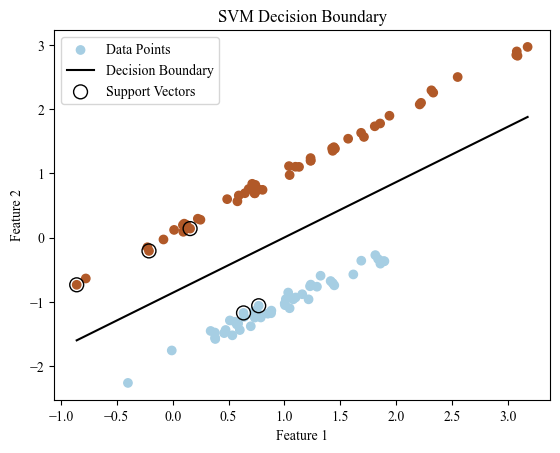

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Train SVM model
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Data Points')

# Plot decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]  # Slope of the line
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (clf.intercept_[0]) / w[1]  # Equation of the line
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Highlight support vectors
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()

# Save the figure
plt.savefig('svm_decision_boundary.png')

# Show the plot
plt.show()


In [17]:
y_pred_train = svm.predict(X_train_sc)
train_data_result = {'NIFTY50_train_pred': y_pred_train.ravel()}
df_1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train), pd.DataFrame(train_data_result)], axis=1)
df_1.to_csv('4a Train_data_with_Result.csv')
y_pred_test = svm.predict(X_test_sc)
test_data_result = {'NIFTY50_test_pred': y_pred_test.ravel()}
df_2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test), pd.DataFrame(test_data_result)], axis=1)
df_2.to_csv('4b Test_data_with_Result.csv')
y_pred = svm.predict(X_sc)
total_data_result = {'NIFTY50_pred': y_pred.ravel()}
df_3 = pd.concat([pd.DataFrame(X), pd.DataFrame(y), pd.DataFrame(total_data_result)], axis=1)
df_3.to_csv('4c Total_data_with_Result.csv')

In [18]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [19]:
print("\nTrain Accuracy: {:.2f} %".format(train_accuracy*100), 
      "\tTest Accuracy: {:.2f} %".format(test_accuracy*100))
print("\nTrain Precision: {:.2f} %".format(train_precision*100),
      "\tTest Precision: {:.2f} %".format(test_precision*100))
print("\nTrain Recall: {:.2f} %".format(train_recall*100),
      "\t\tTest Recall: {:.2f} %".format(test_recall*100))
print("\nTrain F1-Score: {:.4f}".format(train_f1),
      "\t\tTest F1-Score: {:.4f}".format(test_f1))
print("\nTrain ROC-AUC: {:.4f}".format(train_roc_auc),
      "\t\tTest ROC-AUC: {:.4f}".format(test_roc_auc), "\n")


Train Accuracy: 55.81 % 	Test Accuracy: 57.21 %

Train Precision: 55.81 % 	Test Precision: 57.21 %

Train Recall: 100.00 % 		Test Recall: 100.00 %

Train F1-Score: 0.7164 		Test F1-Score: 0.7278

Train ROC-AUC: 0.5000 		Test ROC-AUC: 0.5000 



In [17]:
# matrix1 = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
#                        index=['Negative','Positive'], columns=['Negative','Positive'])
# np.savetxt("5a conf_mat_train.csv", matrix1, delimiter=",")
# matrix2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
#                        index=['Negative','Positive'], columns=['Negative','Positive'])
# np.savetxt("5b conf_mat_test.csv", matrix2, delimiter=",")
# matrix3 = pd.DataFrame(confusion_matrix(y, y_pred), 
#                        index=['Negative','Positive'], columns=['Negative','Positive'])
# np.savetxt("5c conf_mat_total.csv", matrix3, delimiter=",")

# # Plot the confusion matrix
# fig = plt.figure()
# ax = plt.subplot()
# ax = sns.heatmap(matrix1, annot=True, fmt='g', cmap="YlGnBu")
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
# ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
# ax.set_ylabel("True", fontsize = 12, weight='bold')
# fig.savefig('5a conf_mat_train', bbox_inches='tight', dpi = 300)
# fig = plt.figure()
# ax = plt.subplot()
# ax = sns.heatmap(matrix2, annot=True, fmt='g', cmap="YlGnBu")
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
# ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
# ax.set_ylabel("True", fontsize = 12, weight='bold')
# fig.savefig('5b conf_mat_test', bbox_inches='tight', dpi = 300)
# fig = plt.figure()
# ax = plt.subplot()
# ax = sns.heatmap(matrix3, annot=True, fmt='g', cmap="YlGnBu")
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
# ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
# ax.set_ylabel("True", fontsize = 12, weight='bold')
# fig.savefig('5c conf_mat_total', bbox_inches='tight', dpi = 300)

In [18]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import numpy as np
# import random

# kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']

# # Define the objective function
# def objf(X , kernal_options):

#     C_min, C_max = 0.1, 100.0
#     gamma_min, gamma_max = 0.01, 10.0

#     kernel_idx = int(X[0] * len(kernel_options))
#     if kernel_idx >= len(kernel_options):
#         kernel_idx = len(kernel_options) - 1
#     kernel = kernel_options[kernel_idx]

#     C = X[1] * (C_max - C_min) + C_min
#     gamma = X[2] * (gamma_max - gamma_min) + gamma_min

#     # Train SVM model
#     clf = SVC(kernel=kernel, C=C, gamma=gamma)
#     clf.fit(X_train_sc, y_train)

#     # Predict and compute accuracy
#     y_pred = clf.predict(X_test_sc)
#     return -accuracy_score(y_test, y_pred)  # Negative for minimization

In [4]:
# Load the saved variables from disk
import joblib
X_train_sc = joblib.load('X_train_sc.pkl')
X_test_sc = joblib.load('X_test_sc.pkl')
y_test = joblib.load('y_test.pkl')
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')

In [2]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
n = 0 
# Define GWO function
def GWO(objf, lb, ub, dim, SearchAgents_no, Max_iter):
    # Initialize alpha, beta, and delta positions and scores
    Alpha_pos = np.zeros(dim)
    Alpha_score = float("inf")
    
    Beta_pos = np.zeros(dim)
    Beta_score = float("inf")
    
    Delta_pos = np.zeros(dim)
    Delta_score = float("inf")

    # Initialize positions of search agents
    Positions = np.random.uniform(0, 1, (SearchAgents_no, dim)) * (np.array(ub) - np.array(lb)) + np.array(lb)
    

    print("GWO is optimizing \"" + objf.__name__ + "\"")    

    # Main loop
    for l in range(Max_iter):
        for i in range(SearchAgents_no):
            # Return the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i, j] = round(np.clip(Positions[i, j], lb[j], ub[j]), 2)
            print(Positions)
            # Calculate objective function for each search agent
            fitness = objf(Positions[i, :])
            print(fitness)
            # Update Alpha, Beta, and Delta
            if fitness < Alpha_score:
                Alpha_score = fitness
                Alpha_pos = Positions[i, :].copy()
            
            if fitness > Alpha_score and fitness < Beta_score:
                Beta_score = fitness
                Beta_pos = Positions[i, :].copy()
            
            if fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score: 
                Delta_score = fitness
                Delta_pos = Positions[i, :].copy()
        
        a = 2 - l * ((2) / Max_iter)

        # Update the position of search agents including omegas
        for i in range(SearchAgents_no):
            for j in range(dim):     
                r1 = random.random()
                r2 = random.random()
               
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                
                D_alpha = abs(C1 * Alpha_pos[j] - Positions[i, j])
                X1 = Alpha_pos[j] - A1 * D_alpha
                           
                r1 = random.random()
                r2 = random.random()
                
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                
                D_beta = abs(C2 * Beta_pos[j] - Positions[i, j])
                X2 = Beta_pos[j] - A2 * D_beta       
                
                r1 = random.random()
                r2 = random.random() 
                
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                
                D_delta = abs(C3 * Delta_pos[j] - Positions[i, j])
                X3 = Delta_pos[j] - A3 * D_delta    

                # Round positions to two decimal places
                X1 = round(X1, 2)
                X2 = round(X2, 2)
                X3 = round(X3, 2)
                
                print(X1 , X2 , X3 )
                Positions[i, j] = (X1 + X2 + X3) / 3
                
    
    print("Alpha position =", Alpha_pos)
    print("Beta position =", Beta_pos)
    print("Delta position =", Delta_pos)

    return Alpha_pos, Alpha_score


In [20]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def objf(X):
    kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
    C_min, C_max = 0.1, 100.0
    gamma_min, gamma_max = 0.01, 10.0
    max_iter_min, max_iter_max = 1000, 100000  # Adjust according to your requirements

    kernel_idx = int(X[0] * len(kernel_options))
    if kernel_idx >= len(kernel_options):
        kernel_idx = len(kernel_options) - 1
    kernel = kernel_options[kernel_idx]

    C = X[1] * (C_max - C_min) + C_min
    gamma = X[2] * (gamma_max - gamma_min) + gamma_min
    max_iter = int(X[3] * (max_iter_max - max_iter_min) + max_iter_min)

    # Train SVM model
    clf = SVC(kernel=kernel, C=C, gamma=gamma, cache_size=100, max_iter=max_iter)
    clf.fit(X_train_sc, y_train)
    joblib.dump(clf, 'GWO.pkl')
    
    clf = joblib.load('GWO.pkl')
    y_pred = clf.predict(X_test_sc)
    return -accuracy_score(y_test, y_pred)  # Negative for minimization

# Example usage
lb = [0, 0, 0, 0]  # Lower bounds for kernel index, C, gamma, max_iter
ub = [1, 1, 1, 1]  # Upper bounds for kernel index, C, gamma, max_iter
dim = 4  # Dimensionality of the search space
num_wolves = 5  # Number of search agents (wolves)
num_iterations = 2  # Number of iterations

best_params, best_score = GWO(objf, lb, ub, dim, num_wolves, num_iterations)
print("Best parameters:", best_params)
print("Best score:", -best_score)

GWO is optimizing "objf"
[[0.04       0.72       0.6        0.        ]
 [0.5833912  0.67322188 0.18164994 0.89307042]
 [0.03730936 0.46727807 0.91649444 0.63368682]
 [0.98357944 0.87133723 0.45534027 0.42372573]
 [0.18201722 0.92496425 0.02528816 0.70507376]]
-0.4881010199125789
[[0.04       0.72       0.6        0.        ]
 [0.58       0.67       0.18       0.89      ]
 [0.03730936 0.46727807 0.91649444 0.63368682]
 [0.98357944 0.87133723 0.45534027 0.42372573]
 [0.18201722 0.92496425 0.02528816 0.70507376]]
-0.6412497976363931
[[0.04       0.72       0.6        0.        ]
 [0.58       0.67       0.18       0.89      ]
 [0.04       0.47       0.92       0.63      ]
 [0.98357944 0.87133723 0.45534027 0.42372573]
 [0.18201722 0.92496425 0.02528816 0.70507376]]
-0.5721223895094706
[[0.04       0.72       0.6        0.        ]
 [0.58       0.67       0.18       0.89      ]
 [0.04       0.47       0.92       0.63      ]
 [0.98       0.87       0.46       0.42      ]
 [0.18201722 0.9249

In [ ]:
# # Define the objective function
# def objf(X):
#     kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
#     C_min, C_max = 0.1, 50.0
#     gamma_min, gamma_max = 0.01, 5.0

#     kernel_idx = int(X[0] * len(kernel_options))
#     if kernel_idx >= len(kernel_options):
#         kernel_idx = len(kernel_options) - 1
#     kernel = kernel_options[kernel_idx]

#     C = X[1] * (C_max - C_min) + C_min
#     gamma = X[2] * (gamma_max - gamma_min) + gamma_min

#     # Train SVM model
#     clf = SVC(kernel=kernel, C=C, gamma=gamma)

#     # Train the model on each batch separately
#     for i in range(num_batches):
#         # Extract the current batch
#         start_idx = i * batch_size
#         end_idx = min((i + 1) * batch_size, len(X_train))
#         X_batch = X_train_sc[start_idx:end_idx]
#         y_batch = y_train[start_idx:end_idx]
    
#         # Train the SVM model on the current batch
#         clf.fit(X_batch, y_batch)

    
#     # clf.fit(X_train_sc, y_train)

#     # Predict and compute accuracy
#     y_pred = clf.predict(X_test_sc)
#     return -accuracy_score(y_test, y_pred)  # Negative for minimization

# # Example usage
# lb = [0, 0, 0]  # Lower bounds for kernel index, C, gamma
# ub = [1, 1, 1]  # Upper bounds for kernel index, C, gamma
# dim = 3  # Dimensionality of the search space
# num_wolves = 4  # Number of search agents (wolves)
# num_iterations = 5  # Number of iterations

# # Define batch size
# batch_size = 5000  # Adjust according to your dataset size and memory constraints

# # Calculate the number of batches
# num_batches = len(X_train_sc) // batch_size + 1

# best_params, best_score = GWO(objf, lb, ub, dim, num_wolves, num_iterations)
# print("Best parameters:", best_params)
# print("Best score:", -best_score)


GWO is optimizing "objf"
[[0.94       0.82       0.7       ]
 [0.6811101  0.02836609 0.69230123]
 [0.18891697 0.58936008 0.13731771]
 [0.75379977 0.66636994 0.28834194]]
-0.5122227618585073
[[0.94       0.82       0.7       ]
 [0.68       0.03       0.69      ]
 [0.18891697 0.58936008 0.13731771]
 [0.75379977 0.66636994 0.28834194]]
-0.6121094382386272
[[0.94       0.82       0.7       ]
 [0.68       0.03       0.69      ]
 [0.19       0.59       0.14      ]
 [0.75379977 0.66636994 0.28834194]]
-0.5721223895094706
[[0.94 0.82 0.7 ]
 [0.68 0.03 0.69]
 [0.19 0.59 0.14]
 [0.75 0.67 0.29]]
-0.510603853003076
0.02 0.63 0.22
1.37 0.46 0.7
0.61 -0.98 0.3
0.91 0.69 0.47
0.02 0.7 0.63
0.71 -0.45 -0.38
0.44 0.14 0.17
-0.82 0.54 0.4
1.36 0.17 0.07
-0.12 1.23 0.86
0.52 0.99 0.62
0.84 0.1 0.2
[[ 0.29        0.84        0.        ]
 [ 0.69        0.45       -0.04      ]
 [ 0.25        0.04        0.53333333]
 [ 0.65666667  0.71        0.38      ]]
-0.5721223895094706
[[0.29       0.84       0.      

In [26]:
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']


    # kernel_idx = int(X[0] * len(kernel_options))
    # if kernel_idx >= len(kernel_options):
    #     kernel_idx = len(kernel_options) - 1
kernel = kernel_options[round(best_params[0])]

C = best_params[1]
gamma = best_params[2]

# Train SVM model
clf = SVC(kernel=kernel, C=C, gamma=gamma)
clf.fit(X_train_sc, y_train)
joblib.dump(clf, 'SVM_GWO.pkl')

# Predict and compute accuracy
clf = joblib.load('SVM_GWO.pkl')
y_pred = clf.predict(X_test_sc)
p1 = accuracy_score(y_test, y_pred)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = joblib.load('SVM_GWO.pkl')
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
p1 = accuracy_score(y_test, y_pred)
print(p1)

C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=18820).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.6909502994981382


In [22]:
y_pred_train = clf.predict(X_train_sc)
train_data_result = {'NIFTY50_train_pred': y_pred_train.ravel()}
df_1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train), pd.DataFrame(train_data_result)], axis=1)
df_1.to_csv('6a Train_data_with_Result.csv')
y_pred_test = clf.predict(X_test_sc)
test_data_result = {'NIFTY50_test_pred': y_pred_test.ravel()}
df_2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test), pd.DataFrame(test_data_result)], axis=1)
df_2.to_csv('6b Test_data_with_Result.csv')
y_pred = clf.predict(X_sc)
total_data_result = {'NIFTY50_pred': y_pred.ravel()}
df_3 = pd.concat([pd.DataFrame(X), pd.DataFrame(y), pd.DataFrame(total_data_result)], axis=1)
df_3.to_csv('6c Total_data_with_Result.csv')

In [23]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [26]:
print("\nTrain Accuracy: {:.4f} %".format(train_accuracy*100), 
      "\tTest Accuracy: {:.4f} %".format(test_accuracy*100))
print("\nTrain Precision: {:.4f} %".format(train_precision*100),
      "\tTest Precision: {:.4f} %".format(test_precision*100))
print("\nTrain Recall: {:.4f} %".format(train_recall*100),
      "\t\tTest Recall: {:.4f} %".format(test_recall*100))
print("\nTrain F1-Score: {:.4f}".format(train_f1),
      "\t\tTest F1-Score: {:.4f}".format(test_f1))
print("\nTrain ROC-AUC: {:.4f}".format(train_roc_auc),
      "\t\tTest ROC-AUC: {:.4f}".format(test_roc_auc), "\n")


Train Accuracy: 83.3195 % 	Test Accuracy: 69.0950 %

Train Precision: 84.0005 % 	Test Precision: 72.3521 %

Train Recall: 86.6111 % 		Test Recall: 74.4199 %

Train F1-Score: 0.8529 		Test F1-Score: 0.7337

Train ROC-AUC: 0.8289 		Test ROC-AUC: 0.6820 



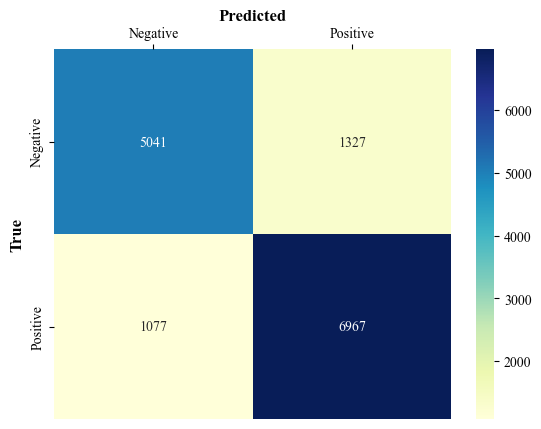

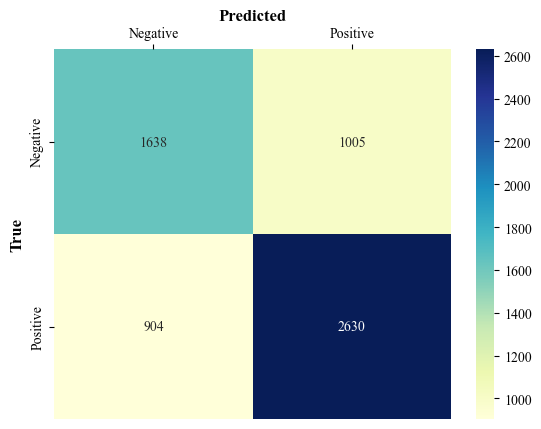

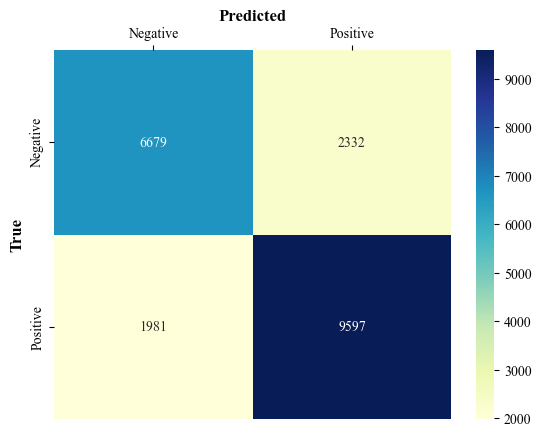

In [25]:
matrix1 = pd.DataFrame(confusion_matrix(y_train, y_pred_train), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("1a conf_mat_train.csv", matrix1, delimiter=",")
matrix2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("1b conf_mat_test.csv", matrix2, delimiter=",")
matrix3 = pd.DataFrame(confusion_matrix(y, y_pred), 
                       index=['Negative','Positive'], columns=['Negative','Positive'])
np.savetxt("1c conf_mat_total.csv", matrix3, delimiter=",")

# Plot the confusion matrix
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix1, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('1a conf_mat_train', bbox_inches='tight', dpi = 300)
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix2, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('1b conf_mat_test', bbox_inches='tight', dpi = 300)
fig = plt.figure()
ax = plt.subplot()
ax = sns.heatmap(matrix3, annot=True, fmt='g', cmap="YlGnBu")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Predicted", fontsize = 12, weight='bold')
ax.set_ylabel("True", fontsize = 12, weight='bold')
fig.savefig('1c conf_mat_total', bbox_inches='tight', dpi = 300)